Loading database at ../../datasets/rc_car/Stanmer_park_dataset/2611/unwrapped_dataset1...
Database contains 391 images
Loading database at ../../datasets/rc_car/Stanmer_park_dataset/2611/unwrapped_dataset2...
Database contains 332 images
Loading database at ../../datasets/rc_car/Stanmer_park_dataset/2611/unwrapped_dataset3...
Database contains 291 images


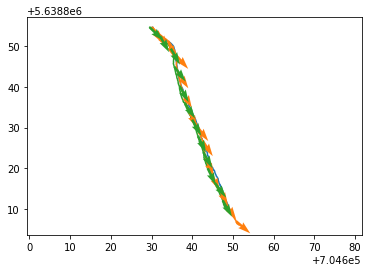

In [1]:
import sys
NAVBENCH_ROOT = '../..'
sys.path.append(NAVBENCH_ROOT)

import matplotlib.pyplot as plt
import navbench as nb
from navbench import improc as ip
import numpy as np


IM_SIZE = (90, 25)
PREPROC = ip.resize(*IM_SIZE)
SNAP_STEP = 25


DB_ROOT = os.path.join(NAVBENCH_ROOT, 'datasets/rc_car/Stanmer_park_dataset/2611')
dbs = [nb.Database('%s/unwrapped_dataset%d' % (DB_ROOT, i)) for i in range(1, 4)]

_, ax = plt.subplots()
colours = []
for db in dbs:
    line = ax.plot(db.x, db.y)
    colours.append(line[0].get_color())
ax.axis('equal')


heading_offset = dbs[0].calculate_heading_offset(0.25)
image_sets = [db.read_images(preprocess=PREPROC) for db in dbs]

snapshots = image_sets[0]

for db, test_images, colour in zip(dbs[1:], image_sets[1:], colours[1:]):
    test_images = test_images[::SNAP_STEP]

    headings = heading_offset + nb.get_ridf_headings(test_images, snapshots)
    u = np.cos(headings)
    v = np.sin(headings)
    ax.quiver(db.x[::SNAP_STEP], db.y[::SNAP_STEP], u, v, color=colour, zorder=10);

Using cached result from '.navbench_cache/ipython_get_trained_network_f78b2561b82eeedd15437a9c34151626737f6551301b5d0342cb8803a65eb208.pkl'
get_trained_network() took 95.6097 s to run (without caching)
Using cached result from '.navbench_cache/ipython_get_infomax_headings_826fdb9dfa7bdd6f72c81be3c270aa8c942ad9f3b20cb5fa5002be2311e8970a.pkl'
get_infomax_headings() took 11.4663 s to run (without caching)


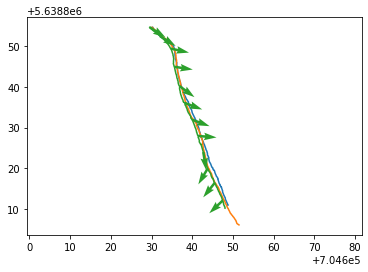

In [2]:
from navbench.infomax import *

training_images = [*image_sets[0], *image_sets[1]]

INFOMAX_SEED = 42
ann = get_trained_network(training_images, INFOMAX_SEED)

_, ax = plt.subplots()
colours = []
for db in dbs:
    line = ax.plot(db.x, db.y)
    colours.append(line[0].get_color())
ax.axis('equal')

for db, test_images, colour in zip([dbs[2]], [image_sets[2]], [colours[2]]):
    test_images = test_images[::SNAP_STEP]

    headings = heading_offset + get_infomax_headings(ann, test_images)
    u = np.cos(headings)
    v = np.sin(headings)
    ax.quiver(db.x[::SNAP_STEP], db.y[::SNAP_STEP], u, v, color=colour, zorder=10);